In [276]:
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.optimize as opt
import scipy.stats as stats

In [277]:
#Create necessary functions:

def ScaledPoisson(x,A,mu):
    #Scaled Poisson distr. to fit to
    return A*stats.poisson.pmf(x,mu)

def plotSignalOverTime(x,y):
    fig,ax = plt.subplots()
    ax.plot(x/60,y)
    ax.set_xlabel('Time / Minutes')
    ax.set_ylabel('Counts per repetition')
    return fig,ax

def plotDistribution(X,guess,start = 0):
    #Makes plot of data distribution (with automatic axis labels) and sqrt(y) error and fits to poisson
    #parameters:
    #X -- 
    #guess = [A,mu] -- array with amplitude and mean value guess for the scaled poisson distribution.
    x,y = countOccurence(X,start = start)
    fig,ax = plt.subplots()
    ax.errorbar(x,y,np.sqrt(y), markersize = 2, ls = '',color = 'k',marker = 'o')
    ax.set_xlabel('Counts in a repetition')
    ax.set_ylabel('Frequency')
    
    sigma_var = np.sqrt(np.sum(1/(len(X)**2)*X)+1/(len(X)**2)*np.sum(X))
    
    popt,pcov = opt.curve_fit(ScaledPoisson,x,y,p0 = guess,sigma = np.sqrt(y+1),absolute_sigma= True)
    ax.plot(x,ScaledPoisson(x,popt[0],popt[1]))
    fig.suptitle(rf'$\sigma^2 = {np.std(X)**2:.2f}\pm {sigma_var:.2f}$,   $\mu = {popt[1]:.2f}\pm{(np.sqrt(pcov[1,1])):.2f}$')


    return fig,ax,(popt,pcov)

def countOccurence(N,start = 0,endPoint = None):
    #Count the occurence of each element in N
    #Parameters -- np.array to count elements of

    #Returns:
    # NSorted -- Ion count values sorted from highest to lowest
    # Occurences -- number of times each N in NSorted was counted

    if endPoint == None:
        NSorted = []
        Occurences = []
        for j in np.arange(start,np.max(N)+20): #Silly hack, but helps with the formatting
            NSorted.append(j)
            Occurences.append(list(N).count(j))
        return np.array(NSorted), np.array(Occurences)
    else:
        NSorted = []
        Occurences = []
        for j in np.arange(start,endPoint): #Silly hack, but helps with the formatting
            NSorted.append(j)
            Occurences.append(list(N).count(j))
        return np.array(NSorted), np.array(Occurences)

def loadData(datafile,skip):
    #Load the recorded data and return a 
    
    #Parameters:
    # datafile -- txt file with 3 columns, first column is always 300, 2nd is number of ions in a repetition and 3rd is the time of the repetition
    # skip -- number of rows to skip when loading datafile

    #Returns:
    #Ns -- np array with number of counts for each repetition
    #times -- time.time() value when the measurement was made
    loader = np.loadtxt(datafile,skiprows = skip, delimiter = ',')
    filter = loader[:,0]!=0
    Ns = loader[:,1][filter]
    times = loader[:,2][filter]
    return Ns, times





20nsRise10shot_50ms_BIGLOAD
20nsRise25shot_50ms_BIGLOAD
20nsRise30shot_50ms_BIGLOAD
20nsRise35shot_50ms_BIGLOAD
20nsRise40shot_50ms_BIGLOAD
20nsRise50shot_50ms_BIGLOAD
20nsRise60shot_50ms_BIGLOAD
Figures


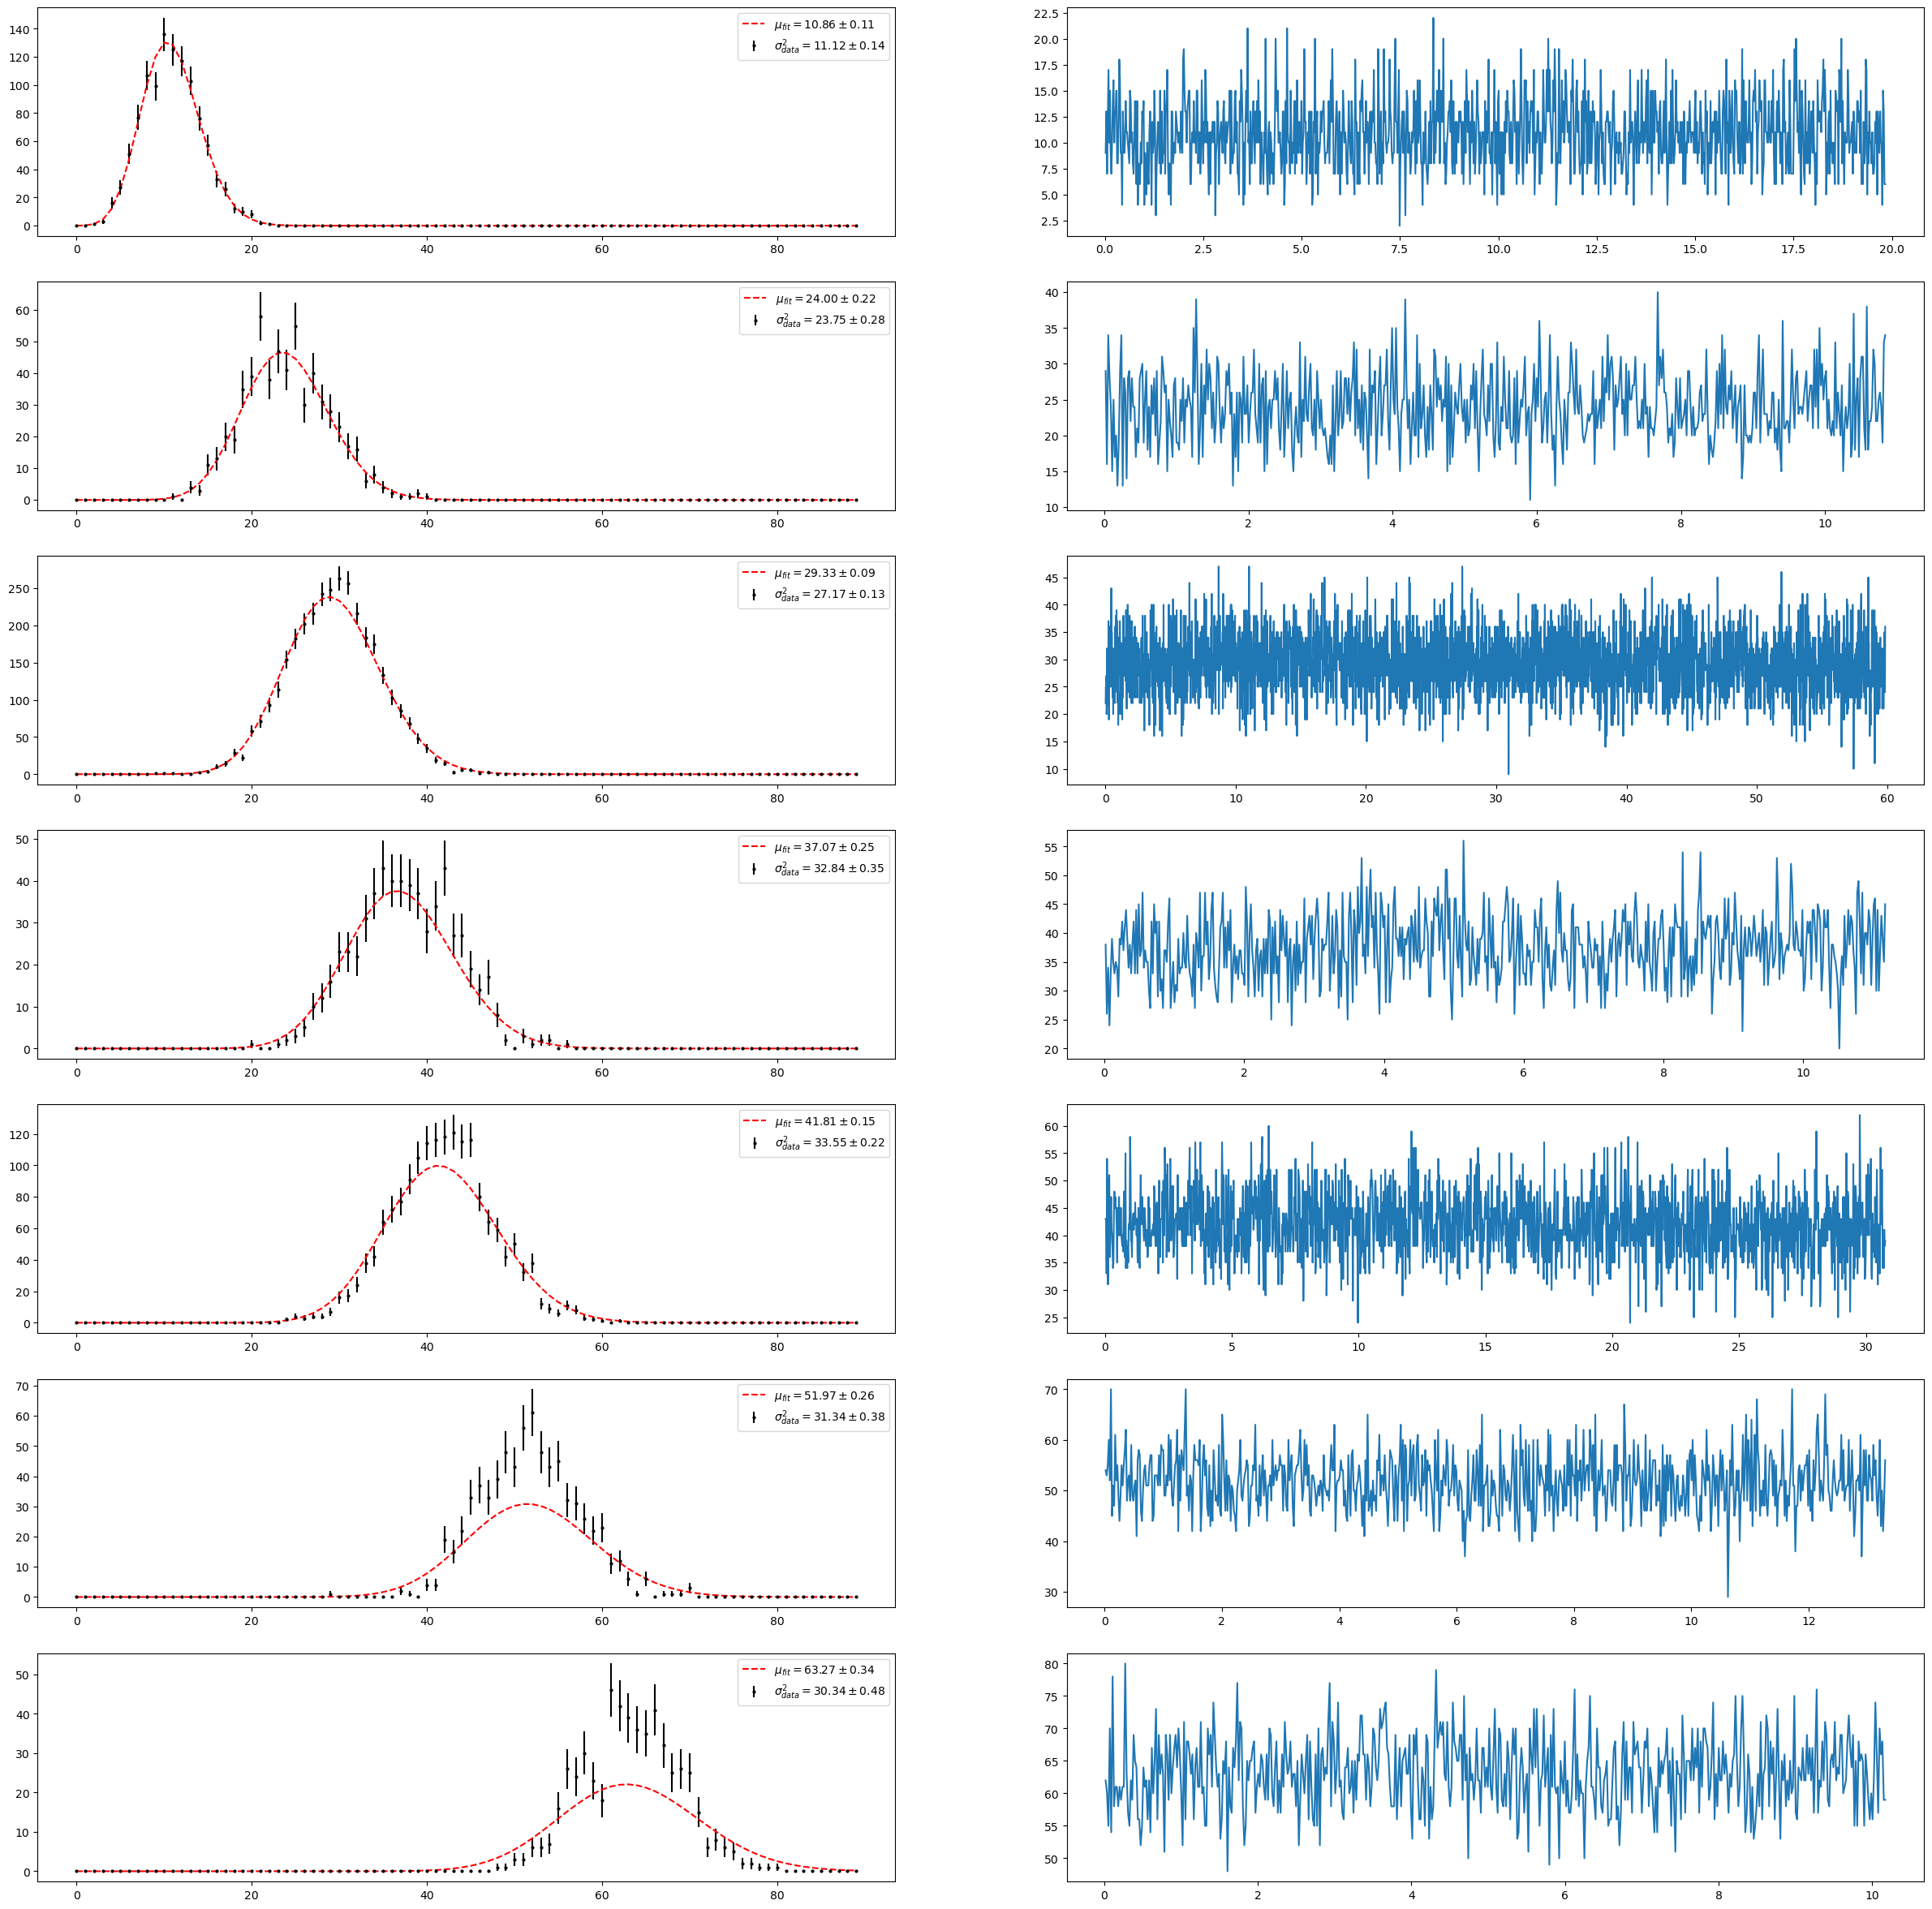

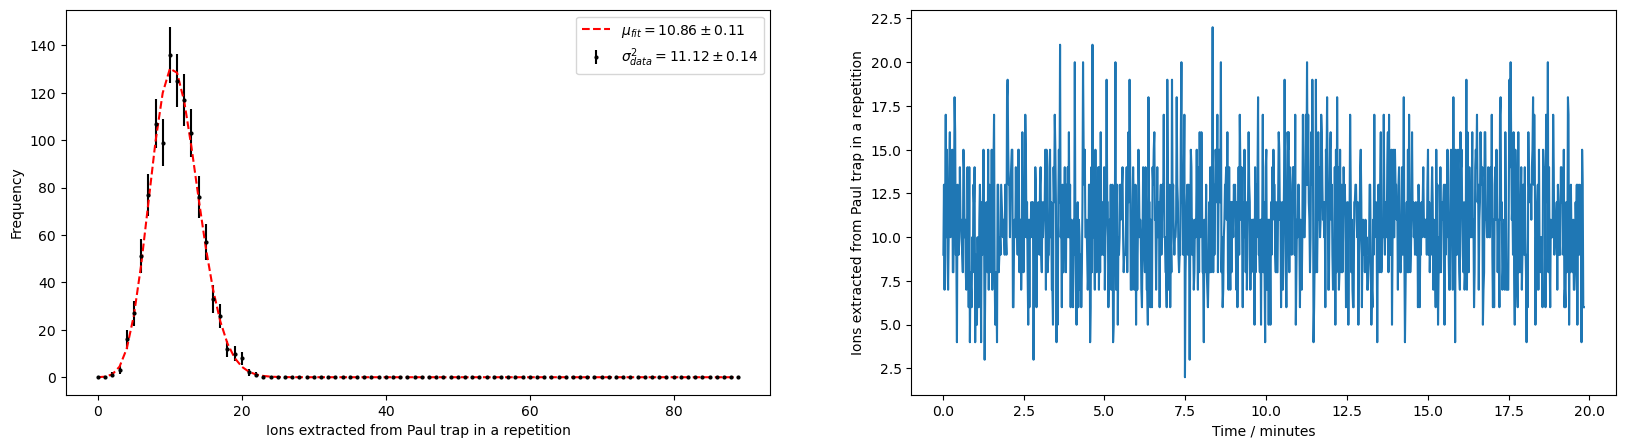

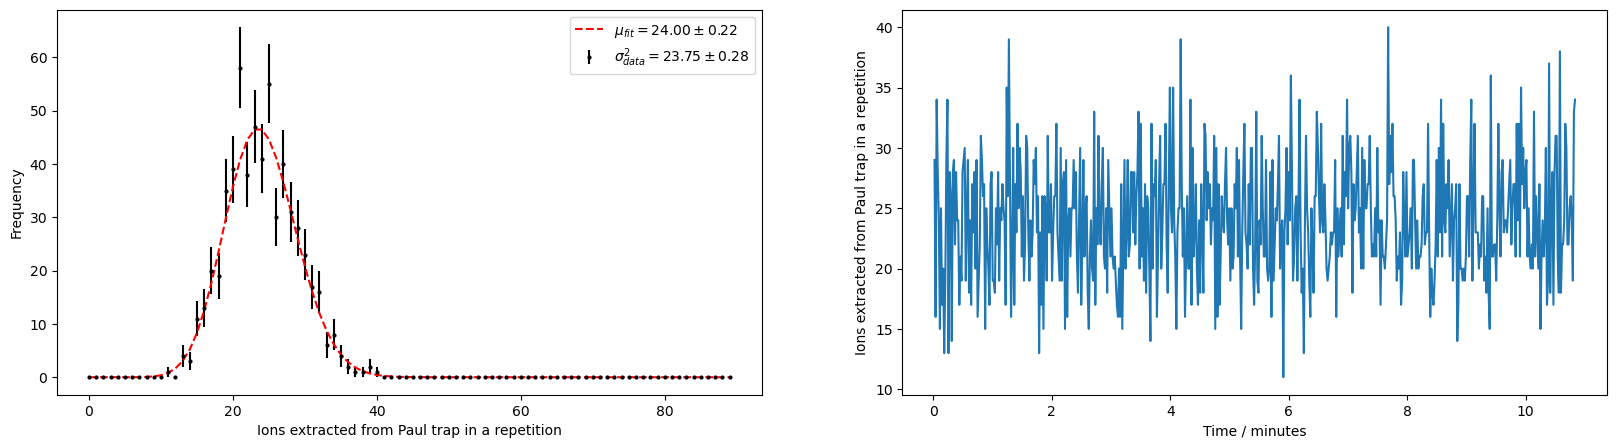

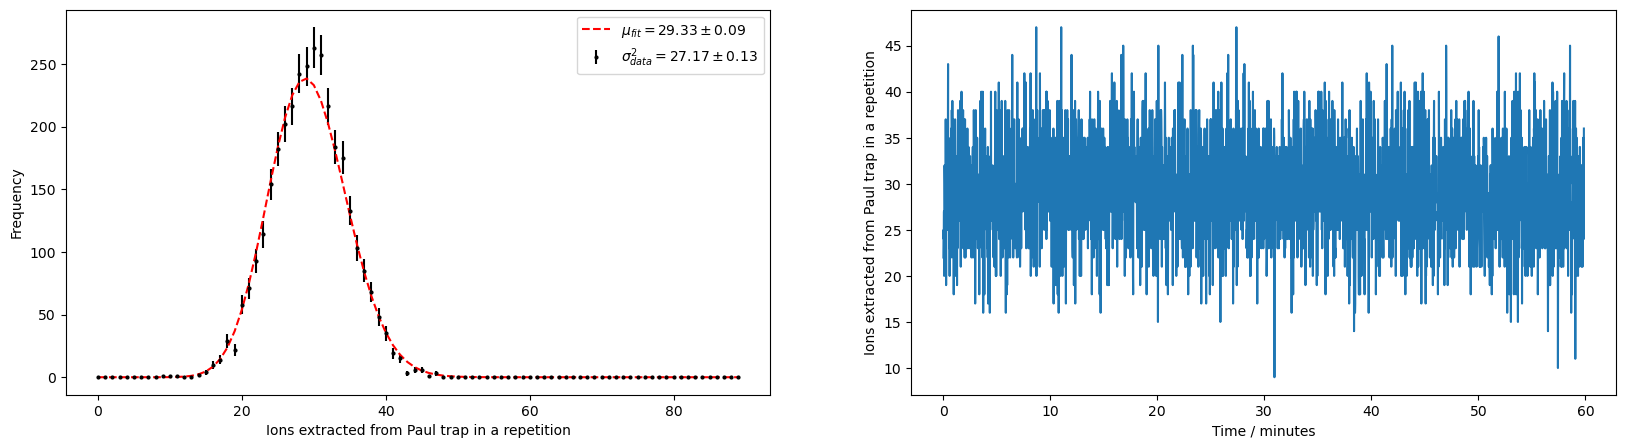

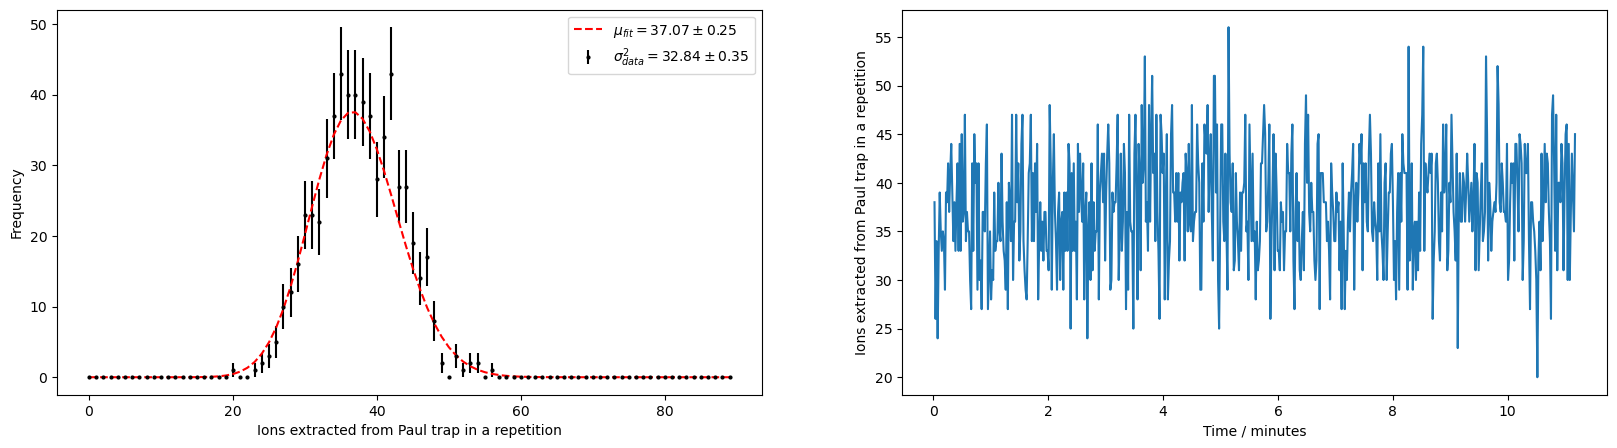

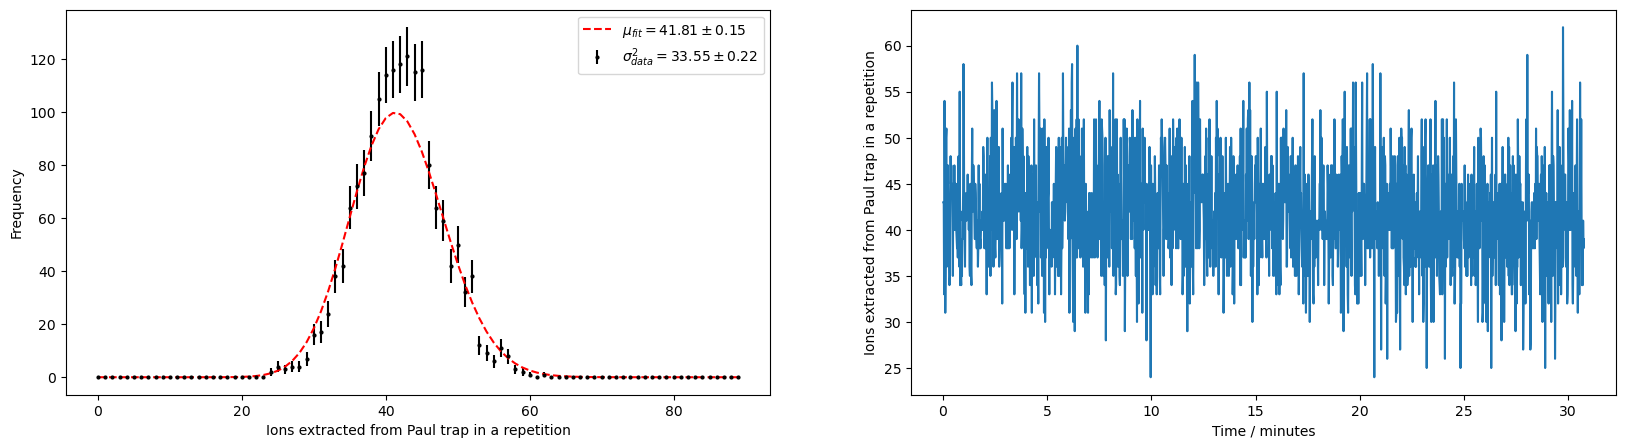

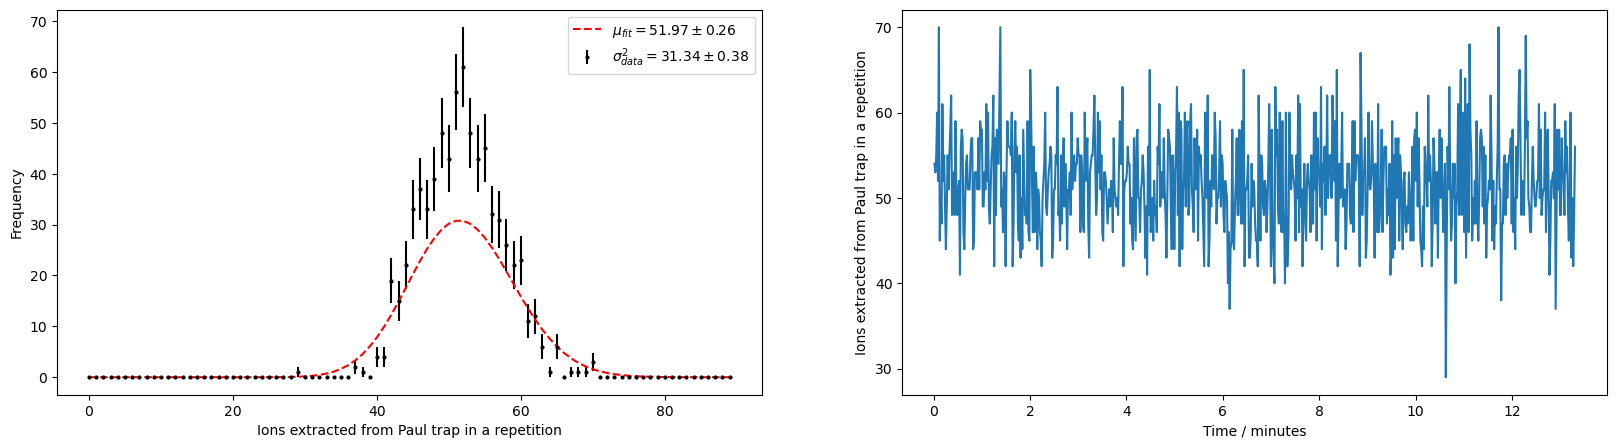

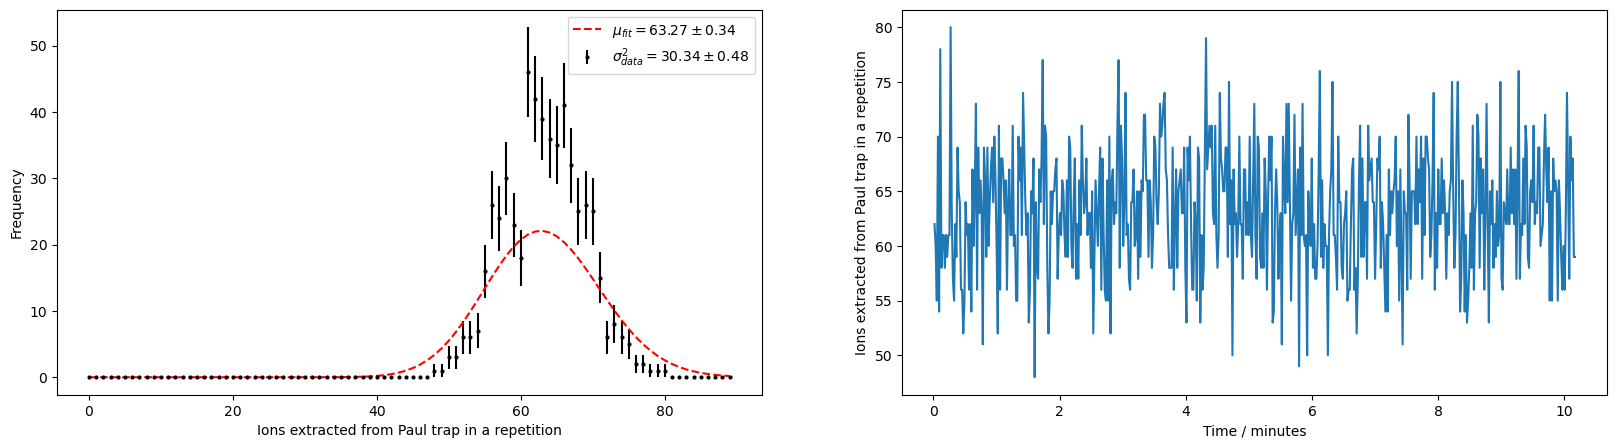

In [278]:
directory = r'C:\Users\lenle\Documents\PhD-Work\Lab Stuff\Poisson\DATAFolder'
numberOfPlots = len(os.listdir(directory))
figTotal,axTotal = plt.subplots(7,2,figsize = (30,30))
directoryFig = r'C:\Users\lenle\Documents\PhD-Work\Lab Stuff\Poisson\DATAFolder\Figures'

variances = []
means = []
variance_errors = []
mean_errors = []


for j, filename in enumerate(os.listdir(directory)):
    f = os.path.join(directory,filename)
    print(filename.removesuffix('.txt'))
    if os.path.isfile(f):
        Ns, ts = loadData(f,skip = 1)
        axTotal[j,1].plot(ts/60,Ns)
        #Make the data plot
        x,y = countOccurence(Ns,start = 0,endPoint= 90)
        sigma_var = np.sqrt(np.sum(1/(len(Ns)**2)*Ns)+1/(len(Ns)**2)*np.sum(Ns))
        axTotal[j,0].errorbar(x,y,np.sqrt(y), markersize = 2, ls = '',color = 'k',marker = 'o', label = rf'$\sigma^2_{{data}} = {np.std(Ns)**2:.2f}\pm{sigma_var:.2f}$')
        
        
        guess = [np.sum(y),np.std(Ns)**2]
        popt,pcov = opt.curve_fit(ScaledPoisson,x,y, p0 = guess,sigma = np.sqrt(y+1),absolute_sigma= True)
        axTotal[j,0].plot(x,ScaledPoisson(x,popt[0],popt[1]),ls = '--', color = 'red',label = rf'$\mu_{{fit}} = {popt[1]:.2f}\pm{np.sqrt(pcov[1,1]):.2f}$')
        axTotal[j,0].legend()

        variances.append(np.std(Ns)**2)
        means.append(popt[1])
        variance_errors.append(sigma_var)
        mean_errors.append(np.sqrt(pcov[1,1]))



        smallerFig,smallerAx = plt.subplots(1,2,figsize = (20,5))
        smallerAx[0].errorbar(x,y,np.sqrt(y), markersize = 2, ls = '',color = 'k',marker = 'o', label = rf'$\sigma^2_{{data}} = {np.std(Ns)**2:.2f}\pm{sigma_var:.2f}$')
        smallerAx[0].plot(x,ScaledPoisson(x,popt[0],popt[1]),ls = '--', color = 'red',label = rf'$\mu_{{fit}} = {popt[1]:.2f}\pm{np.sqrt(pcov[1,1]):.2f}$')
        smallerAx[0].legend()
        smallerAx[1].plot(ts/60,Ns)
        smallerAx[0].set_xlabel('Ions extracted from Paul trap in a repetition')
        smallerAx[0].set_ylabel('Frequency')

        smallerAx[1].set_xlabel('Time / minutes')
        smallerAx[1].set_ylabel('Ions extracted from Paul trap in a repetition')
        SmallFigName = (filename.removesuffix('.txt'))+'.png'
        plt.savefig(os.path.join(directoryFig,SmallFigName))

variances = np.array(variances)
means = np.array(means)
variance_errors = np.array(variance_errors)
mean_errors = np.array(mean_errors)
figTotal.savefig(os.path.join(directoryFig,'Total.png'))

Text(0, 0.5, '$\\sigma^2_{data} / \\mu_{fit}$')

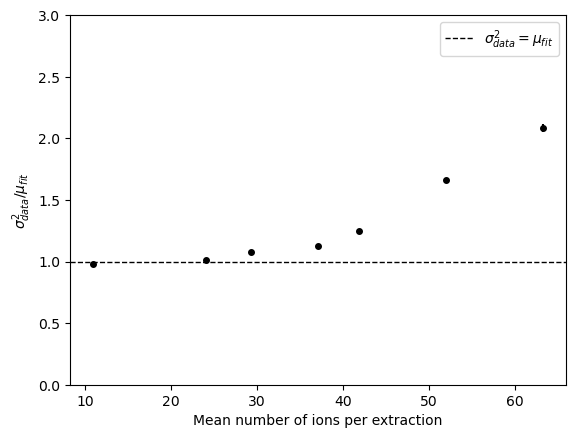

In [279]:
figMuOverSigma, axMuOverSigma = plt.subplots()
errorMuOverSigma = means/variances*np.sqrt((mean_errors/means)**2+(variance_errors/variances)**2)
axMuOverSigma.errorbar(means,means/variances, errorMuOverSigma, ls = '',marker = 'o',markersize = 4, color = 'k')
axMuOverSigma.set_ylim(0,3)
axMuOverSigma.axhline(1, ls = '--', color ='k',linewidth = 1,label = r'$\sigma_{data}^2 = \mu_{fit}$') 
axMuOverSigma.legend()
axMuOverSigma.set_xlabel('Mean number of ions per extraction')
axMuOverSigma.set_ylabel(r'$\sigma^2_{data} / \mu_{fit}$')

figMuOverSigma.savefig(os.path.join(directoryFig,'SigmaOverMu.png'))